In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import numpy as np
from utils import labels2one_hot
from generate_data import generate_data, generate_grid_data
from modules import Dropout
from modules import Linear, Sequential
from modules.losses import LossCrossEntropy
from optimizers import SGD

In [2]:
def plot_data(points, labels=0, minn=0, maxx=1, radius=1/np.sqrt(2*np.pi), center=np.array([0.5, 0.5])):
    circle = plt.Circle(center, radius, color='r', fill=False, linewidth=5)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_patch(circle)
    if torch.is_tensor(points):
        points = points.numpy()
    
    print("points: {} -- points: {}".format(type(points), points.shape))
    ax.scatter(points[:,0], points[:,1], c=labels)
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

In [3]:
def default_net_1(x_all, y_all, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    ce = LossCrossEntropy()

    model = Sequential()
    model.add(Linear(out=num_of_neurons[1], input_size=num_of_neurons[0], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Dropout(prob=0.2))
    model.add(Linear(out=num_of_neurons[4], activation='softmax'))

    model.loss = ce
    sgd = SGD(lr, momentum_coef, weight_decay=0.2)

    sgd.train(model, x_all, y_all, num_of_epochs, val_split=0.2)

    return model

In [4]:
points, labels = generate_data(num_of_points=1000)
points, labels = generate_grid_data(num_of_points_per_dim=51)
print("Points: {} -- labels: {}".format(points.shape, labels.shape))

Points: torch.Size([2601, 2]) -- labels: torch.Size([2601])


points: <class 'numpy.ndarray'> -- points: (2601, 2)


array([ 0.,  1.], dtype=float32)

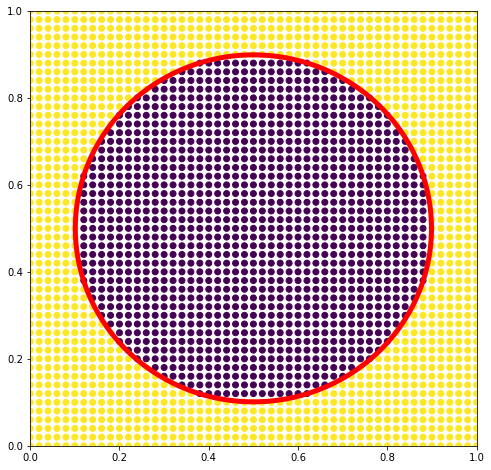

In [5]:
plot_data(points, labels)
np.unique(labels.numpy())

In [6]:
print(labels)


 1
 1
 1
⋮ 
 1
 1
 1
[torch.FloatTensor of size 2601]



In [7]:
x_all, y_all = generate_data(num_of_points=500)
y_all = labels2one_hot(y_all, val=0)  # convert labels to 1-hot encoding

print("x_all.shape: {} -- y_all.shape: {}".format(x_all.shape, y_all.shape))

x_all.shape: torch.Size([500, 2]) -- y_all.shape: torch.Size([500, 2])


In [8]:
model = default_net_1(x_all, y_all, num_of_epochs=2000)
loss1 = model.loss.loss_logging

Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
Added Module Name: 2_Linear 
Added Module Name: 3_ReLU 
Added Module Name: 4_Linear 
Added Module Name: 5_ReLU 
Added Module Name: 6_Dropout 
Added Module Name: 7_Linear 
Added Module Name: 8_Softmax 
epoch: 0 ---> train_loss: 0.6991, train_acc: 0.5 ----- val_loss: 0.6922, val_acc: 0.53
epoch: 100 ---> train_loss: 0.6924, train_acc: 0.5425 ----- val_loss: 0.6927, val_acc: 0.57
epoch: 200 ---> train_loss: 0.6913, train_acc: 0.6175 ----- val_loss: 0.6918, val_acc: 0.55
epoch: 300 ---> train_loss: 0.6913, train_acc: 0.5975 ----- val_loss: 0.6899, val_acc: 0.65
epoch: 400 ---> train_loss: 0.6882, train_acc: 0.69 ----- val_loss: 0.6909, val_acc: 0.6
epoch: 500 ---> train_loss: 0.6833, train_acc: 0.755 ----- val_loss: 0.6844, val_acc: 0.76
epoch: 600 ---> train_loss: 0.6740, train_acc: 0.7775 ----- val_loss: 0.6756, val_acc: 0.78
epoch: 700 ---> train_loss: 0.6448, train_acc: 0.82 ----- val_loss: 0.6431, val_acc: 0.86
epoch: 800 ---> tr

In [9]:
x_test, y_test = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51)
test_acc, test_loss, y_pred = model.evaluate(x_test, labels2one_hot(y_test, val=0), return_pred=True)

In [10]:
print(test_acc, test_loss)

0.9588619761630143 0.09606028348207474


torch.Size([2601, 2])  --  torch.Size([2601])
points: <class 'numpy.ndarray'> -- points: (2601, 2)


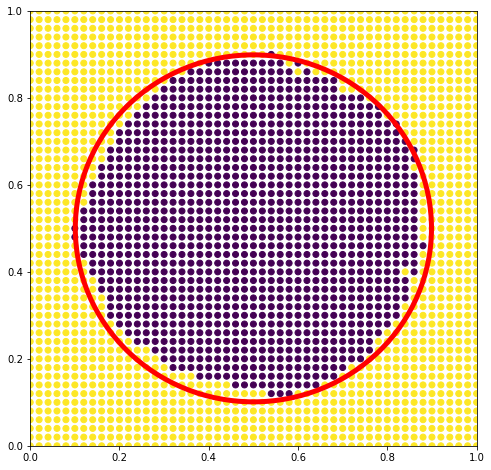

In [11]:
print(x_test.shape, " -- ", y_pred.shape)
plot_data(x_test, y_pred)